# **GOALS**

*   Mengoptimalkan hasil campaign terkait penawaran produk baru, sehingga mendapatkan profit yang maksimal di bulan depan
*   Memahami karakteristik customers yang menerima penawaran produk tersebut

## **Data Quality Checks**

*   Q1. Adakah features yang data type-nya tidak sesuai?
*   Q2. Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?
*   Q3. Apakah terdapat distribusi yang tidak masuk akal?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data
filename = '/content/drive/My Drive/marketing-analytics/iFood/data/marketing_data.csv'
df = pd.read_csv(filename)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [4]:
df.shape

(2240, 28)

**Q1. Adakah features yang data type-nya tidak sesuai?**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Note :

*   Column Income hapus spacenya dan ubah typenya menjadi float
*   Column Dt_Customer ubah typenya menjadi datetime

In [7]:
# Cek data unique

for dtype, col in (list(zip(df.dtypes, df.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else :
    print (col, dtype)
    print (df[col].unique())

  print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

In [8]:
# menghapus space pada nama column
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [9]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [10]:
# Menghapus $ dan , pada data di colomn Income
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',', '')

# Cek hasil perubahannya
df['Income']

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [11]:
# Ubah data type untuk column Income
df['Income'] = df['Income'].astype('float')
print(df['Income'].dtype)

float64


In [12]:
# Ubah data type untuk column Dt_customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].dtype)

datetime64[ns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Q2. Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?**

Duplicate

In [14]:
# Mengecek banyaknya duplicate data
df.duplicated().sum()

0

Missing Value

In [15]:
# Mengecek banyaknya missing values
df.isna().sum().sort_values(ascending = False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

<Axes: xlabel='Income', ylabel='Density'>

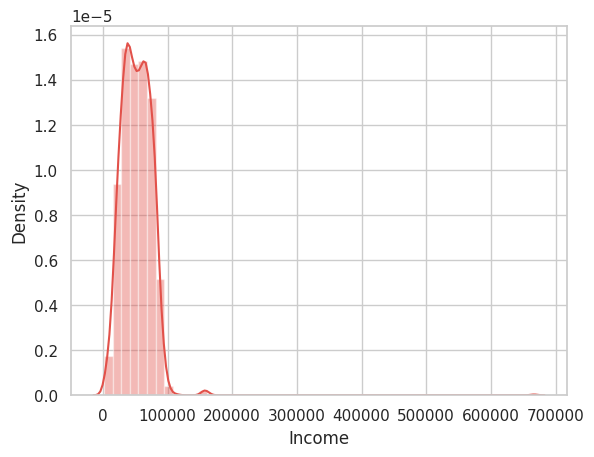

In [16]:
# Mengecek distribusi data pada column Income menggunakan distplot
sns.distplot(df['Income'])

<Axes: >

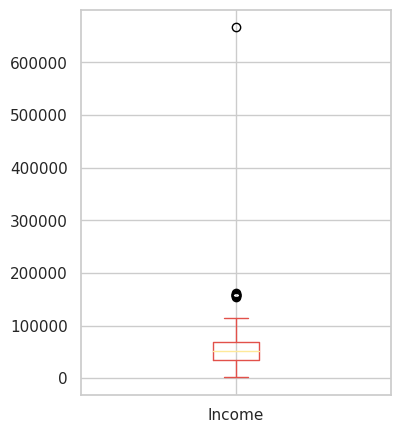

In [17]:
# Mengecek distribusi data pada column Income menggunakan boxplot
df['Income'].plot(kind = 'box', figsize = (4,5))

In [18]:
# Mengecek nilai median pada column Income
df['Income'].median()

51381.5

In [19]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

Outliers

In [20]:
# Mengecek nama-nama column
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [21]:
# Memilih kolom yang akan di-plotkan
df_to_plot = df.select_dtypes(include = ['float', 'int'])
df_to_plot

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1826,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0
2,10476,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0
3,1386,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0
4,5371,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0
2237,22,1976,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0
2238,528,1978,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0


In [22]:
# Menghapus kolom yang tidak diperlukan
df_to_plot.drop(columns=['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain'], inplace = True)
df_to_plot.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

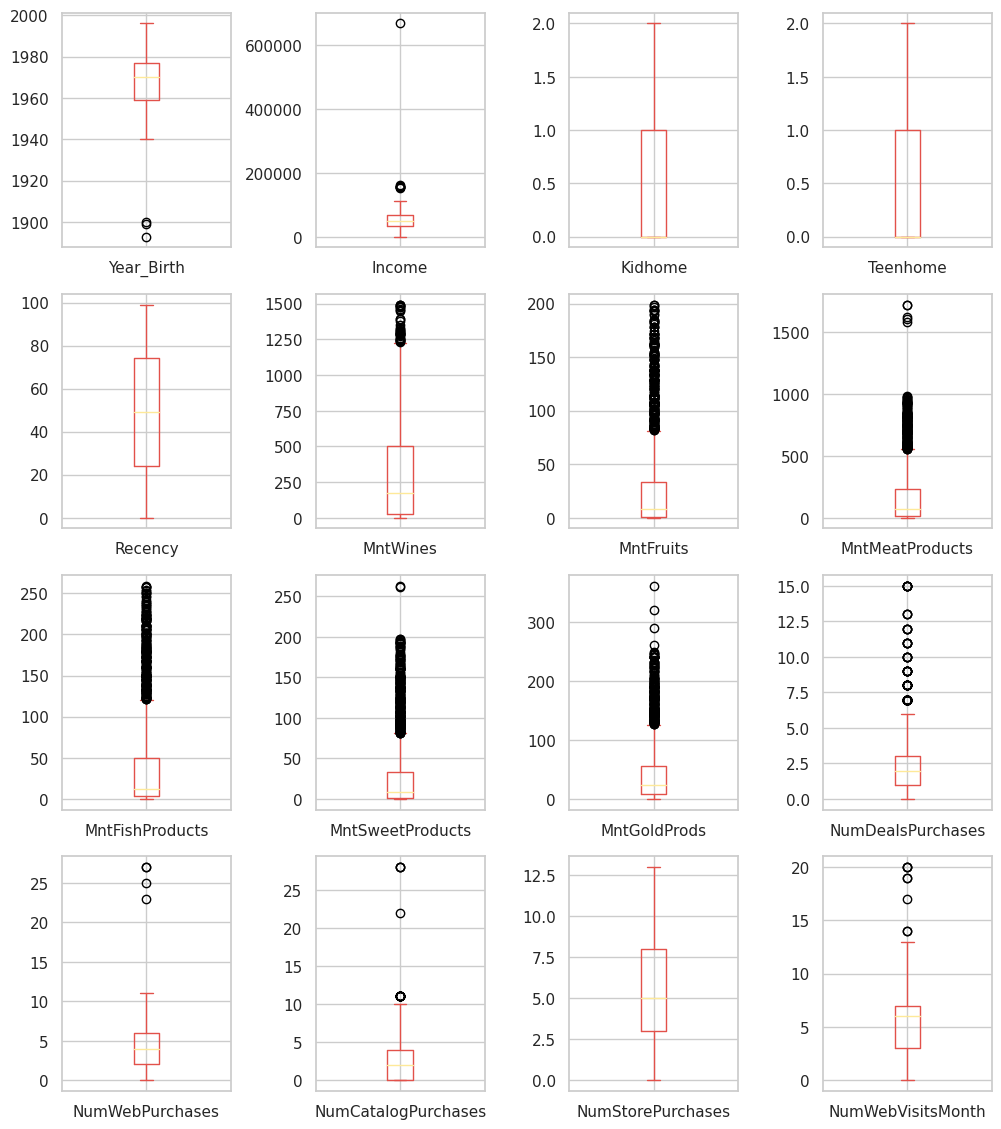

In [23]:
df_to_plot.plot(subplots = True, layout = (4,4), kind = 'box', figsize = (12,14))
plt.subplots_adjust(wspace = 0.5)

In [24]:
# Menghapus data Year_Birth yang nilainya < 1900
df = df[df['Year_Birth'] > 1900].reset_index(drop = True)
df[df['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


**Q3. Apakah terdapat distribusi yang tidak masuk akal?**

In [25]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

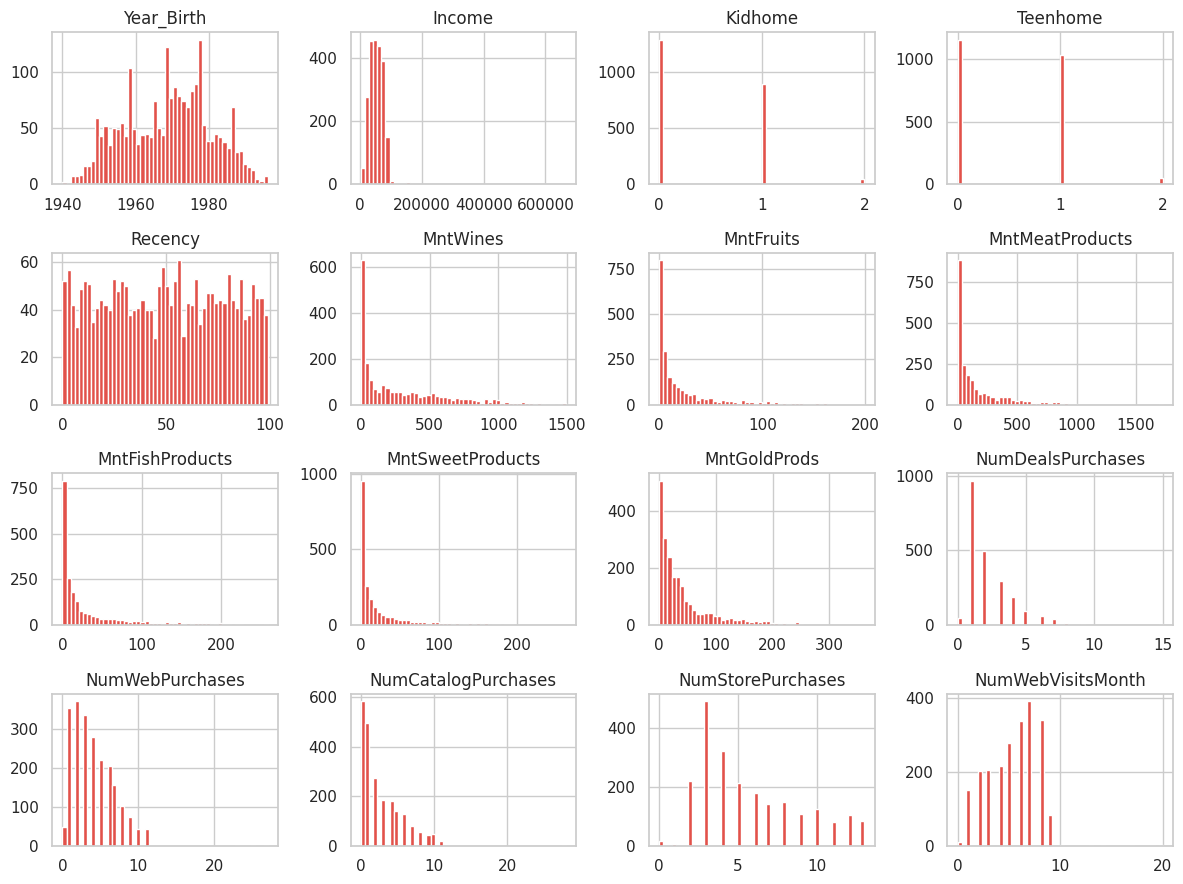

In [26]:
fig = plt.figure(figsize = (12,9))
ax = plt.gca()

df.hist(bins = 50, ax = ax, layout = (4,4), column = numeric)
plt.tight_layout()
plt.show()

## **Data Insights**

- Bagaimana perilaku konsumen dalam menanggapi kampanye pemasaran

**Year Birth**

In [27]:
# Membuat kolom baru yang berisi info usia customer
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Customer_Age']

0       44
1       53
2       56
3       47
4       25
        ..
2232    37
2233    36
2234    36
2235    34
2236    43
Name: Customer_Age, Length: 2237, dtype: int64

<Axes: xlabel='Customer_Age', ylabel='Count'>

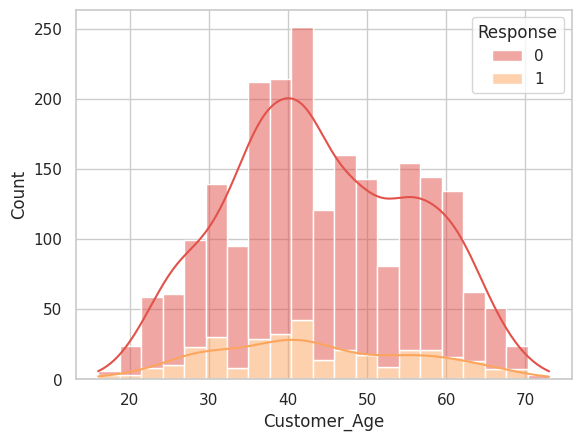

In [28]:
# Membuat plot untuk mengecek distribusi Customer Age
sns.histplot(data = df, x = 'Customer_Age', hue = 'Response', multiple = 'stack', kde = True)

In [29]:
df['Customer_Age'].mean()

44.12606168976308

Note :

*   Rata-rata Customer berusia 40an tahun
*   Tidak terlihat adanya perbedaan distribusi usia berdasarkan response



**Education**

In [30]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

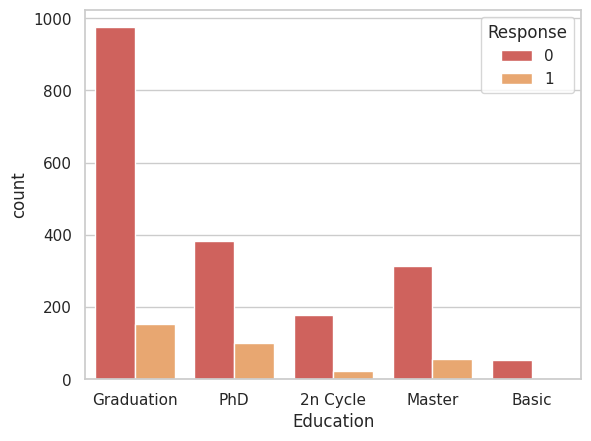

In [64]:
# Membuat plot untuk menghitung banyaknya customer per Education dan Response
sns.countplot(data = df, x = 'Education', hue = 'Response')

In [60]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

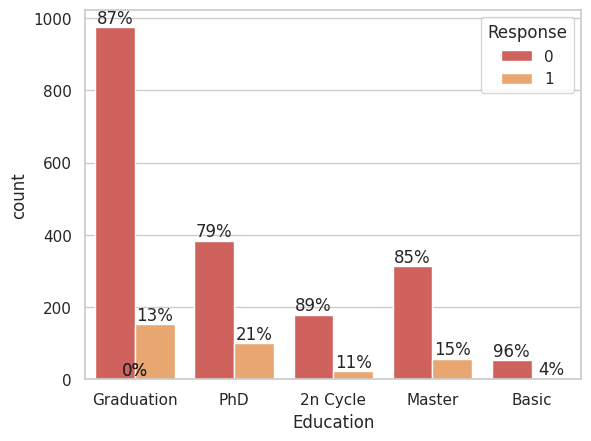

In [63]:
# Memanggil fungsi percentage
ax = sns.countplot(data = df, x = 'Education', hue = 'Response')
barPerc(df, 'Education', ax)

Insights :

Customer dengan education Phd memiliki ketertarikan paling tinggi untuk penawaran campaign

(0.0, 200000.0)

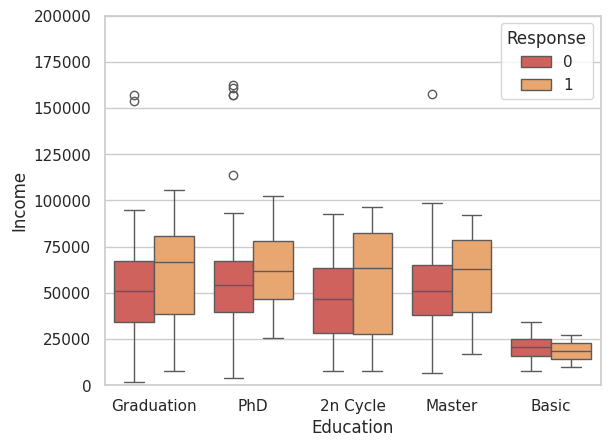

In [34]:
# Membuat boxplot untuk mengecek Income dan Response berdasarkan Education
sns.boxplot(data = df, x = 'Education', y = 'Income', hue = 'Response')
plt.ylim(0,200000)

Insights :

- Untuk Education Graduation, PhD, 2n Cycle Education dan Master memiliki mean yang hampir sama
- Customer dengan Income yang lebih tinggi cenderung menerima penawaran campaign

**Marital Status**

In [35]:
# Mengecek nilai unik dari column Marital_Status
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [36]:
# Mengubah nilai 'YOLO', 'Alone', 'Absurd' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x : 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [37]:
# Mengecek nilai unik dari column Marital_Status setelah perubahan
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

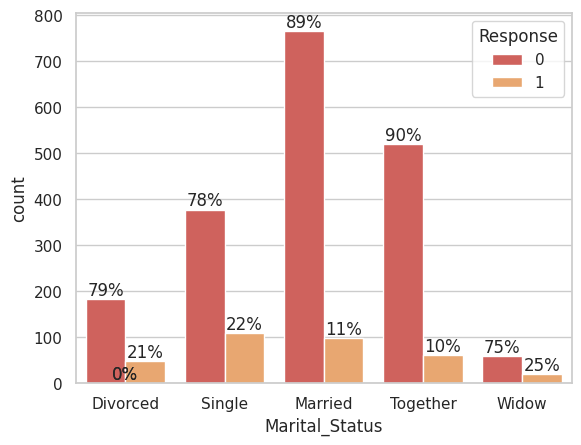

In [38]:
# Memanggil fungsi percentage
ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Response')
barPerc(df, 'Marital_Status', ax)

Insights :

Customer yang tidak berpasangan dan membiayai hidupnya sendiri cenderung menerima penawaran campaign

Kidhome + Teenhome

In [39]:
# Membuat kolom baru yang berisi info tanggungan customer
df['Num_Dependants'] = df['Kidhome'] + df ['Teenhome']

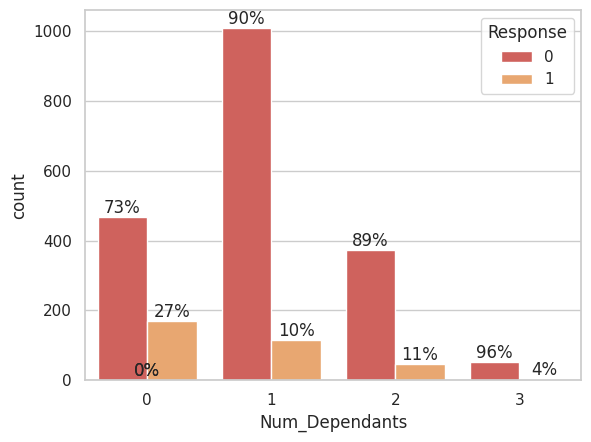

In [40]:
# Memanggil fungsi percentage
ax = sns.countplot(data = df, x = 'Num_Dependants', hue = 'Response')
barPerc(df, 'Num_Dependants', ax)

Insights :

Customer yang tdak memiliki tanggungan cenderung menerima penawaran campaign.

**Customer Join Date**

In [41]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

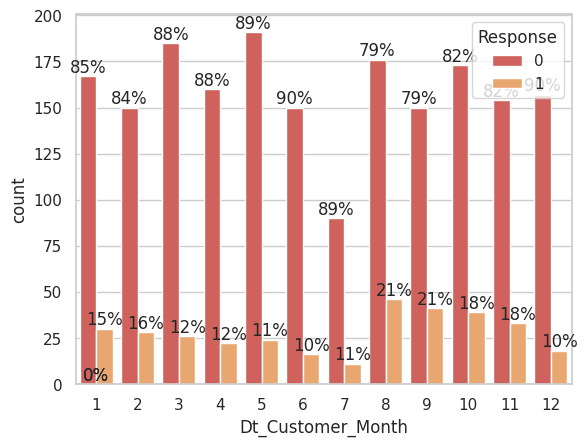

In [42]:
# Memanggil fungsi percentage
ax = sns.countplot(data = df, x = 'Dt_Customer_Month', hue = 'Response')
barPerc(df, 'Dt_Customer_Month', ax)

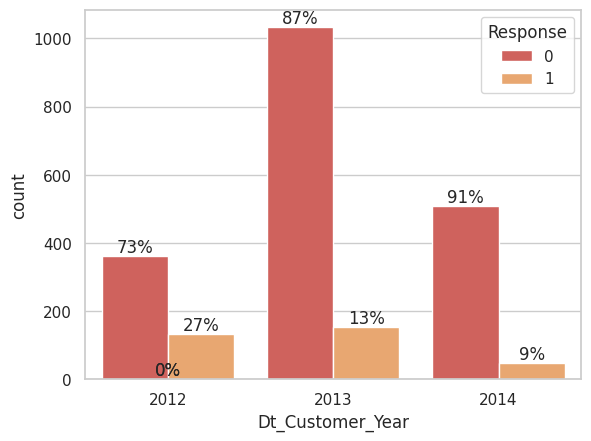

In [43]:
# Memanggil fungsi percentage
ax = sns.countplot(data = df, x = 'Dt_Customer_Year', hue = 'Response')
barPerc(df, 'Dt_Customer_Year', ax)

Insights. :

Semakin lama customer sudah join, semakin besar kemungkinan customer menrima penawaran campaign

**Recency**

<Axes: xlabel='Recency', ylabel='Count'>

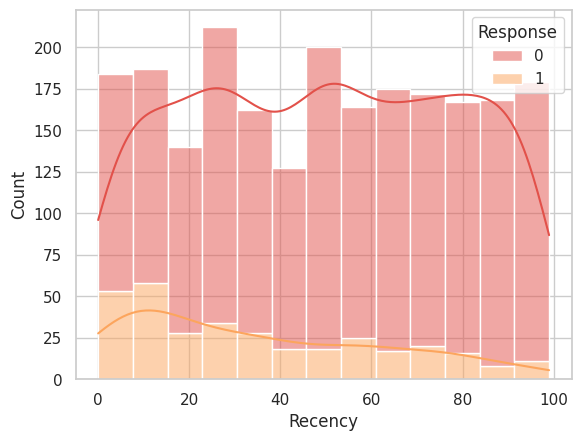

In [44]:
sns.histplot(data = df, x = 'Recency', hue = 'Response', multiple = 'stack', kde = True)

Insights

Customer yang belum lama membeli, maka cenderung menerima penawaran campaign terbaru

**Amount Spent**

In [45]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]

In [46]:
amt_spent_features

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [47]:
amt_spent_features.append('Response')

In [48]:
df[amt_spent_features].corr()[['Response']].sort_values(by = 'Response', ascending = False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [49]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [50]:
df['TotalAmount_Spent'] = df[amt_spent_features].sum(axis=1)
df['TotalAmount_Spent']

0       1190
1        577
2        251
3         11
4         91
        ... 
2232     689
2233      55
2234     309
2235    1383
2236    1078
Name: TotalAmount_Spent, Length: 2237, dtype: int64

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

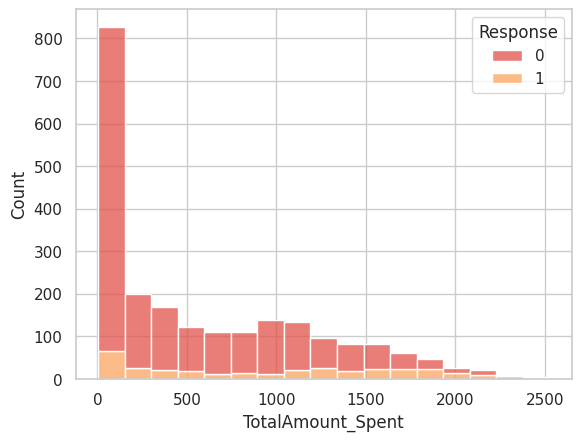

In [51]:
sns.histplot(data = df, x = 'TotalAmount_Spent', hue = 'Response', multiple = 'stack', kde = False)

Insights :

Customer yang sudah berbelanja sekitar 1000-2500 dollar cenderung menerima penawaran campaign

**Purchases**

In [52]:
purchase_features = [ c for c in df.columns if 'Purchase' in str(c)]
purchase_features.append('Response')

In [53]:
purchase_features

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'Response']

In [56]:
df[purchase_features].corr()[['Response']].sort_values(by = 'Response', ascending = False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [58]:
df['Total_Purchases'] = df[purchase_features].sum(axis=1)
df['Total_Purchases']

0       16
1       19
2       11
3        4
4        9
        ..
2232    20
2233     5
2234    14
2235    20
2236    19
Name: Total_Purchases, Length: 2237, dtype: int64

<Axes: xlabel='Total_Purchases', ylabel='Count'>

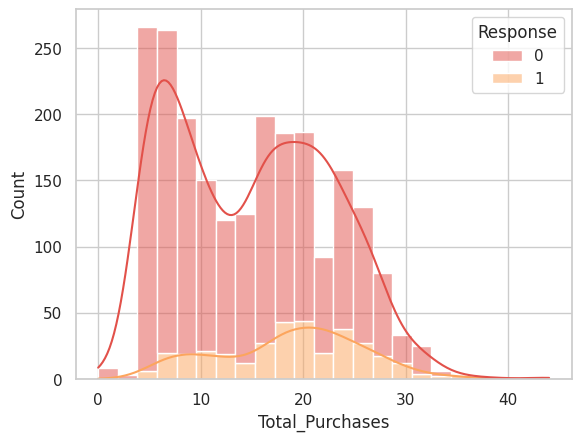

In [59]:
sns.histplot(data = df, x = 'Total_Purchases', hue = 'Response', multiple = 'stack', kde = True)

Insights :

Tidak ada pola unik atau pemisah antara Response 0 dan 1